In [1]:
import pandas
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load csv file
# df = pandas.read_csv('../../results/blimp/blimp_base_qwen_14B_500.csv')
# df = pandas.read_csv('../../results/blimp/blimp_base_qwen_14B_500_filter_all.csv')
df = pandas.read_csv('../../results/blimp/blimp_base_qwen_14B_500_filter_all.csv')

df[:10]

FileNotFoundError: [Errno 2] No such file or directory: '../../results/blimp/blimp_base_qwen_14B_500_filter_all.csv'

In [2]:
# set seaborn style
sns.set(style="white")
# color_palette = sns.color_palette("deep")
# color_palette = sns.color_palette("pastel")
color_palette = sns.color_palette("muted")
# color_palette = sns.color_palette("bright")
# color_palette = sns.color_palette("dark")


# colors = ['purple', 'green', 'orange']
colors = [color_palette[6], color_palette[2], color_palette[1], color_palette[0], color_palette[3], color_palette[5]]
alpha = 0.2
color_palette

[(0.2823529411764706, 0.47058823529411764, 0.8156862745098039),
 (0.9333333333333333, 0.5215686274509804, 0.2901960784313726),
 (0.41568627450980394, 0.8, 0.39215686274509803),
 (0.8392156862745098, 0.37254901960784315, 0.37254901960784315),
 (0.5843137254901961, 0.4235294117647059, 0.7058823529411765),
 (0.5490196078431373, 0.3803921568627451, 0.23529411764705882),
 (0.8627450980392157, 0.49411764705882355, 0.7529411764705882),
 (0.4745098039215686, 0.4745098039215686, 0.4745098039215686),
 (0.8352941176470589, 0.7333333333333333, 0.403921568627451),
 (0.5098039215686274, 0.7764705882352941, 0.8862745098039215)]

In [3]:
def get_scores(df, layer_num, task=None, new_task=False):
    # metric = 'f1'
    
    f1_avgs = []
    f1_ses = []
    if task is not None:
        df = df[df['field'] == task]
    # drop where task is random
    if not new_task:
        df = df[df['tse_type'] != 'random']
    for i in range(layer_num):
        df_layer = df[df['gpt_layer'] == i]
        # print(len(df_layer), i)
        f1_avg = df_layer[metric].mean()
        f1_se = df_layer[metric].std() / (len(df_layer) ** 0.5)
        f1_avgs.append(f1_avg)
        f1_ses.append(f1_se)
    f1_avgs = np.array(f1_avgs)
    f1_ses = np.array(f1_ses)
    return f1_avgs, f1_ses

In [ ]:
# load csv file
df = pandas.read_csv('../../results/blimp/blimp_base_qwen_14B_500_filter.csv')
# syntax_f1_avgs, syntax_f1_ses = get_scores(df, 12, task='syntax')
# syntax_f1_avgs, syntax_f1_ses = get_scores(df, 12, task=None)
syntax_f1_avgs, syntax_f1_ses = get_scores(df, 49, task=None)


syntax_f1_avgs_full = syntax_f1_avgs
syntax_f1_ses_full = syntax_f1_ses
marker = '.'
plt.figure(figsize=(7, 5))
plt.plot(range(12), syntax_f1_avgs_full, marker=marker, label='Syntax', color=colors[0])
plt.fill_between(range(12), syntax_f1_avgs_full - syntax_f1_ses_full, syntax_f1_avgs_full + syntax_f1_ses_full, alpha=alpha, color=colors[0])
plt.yticks(np.arange(0.5, 1.01, 0.1))
plt.xticks(range(12), [str(i) for i in range(12)])
plt.show()

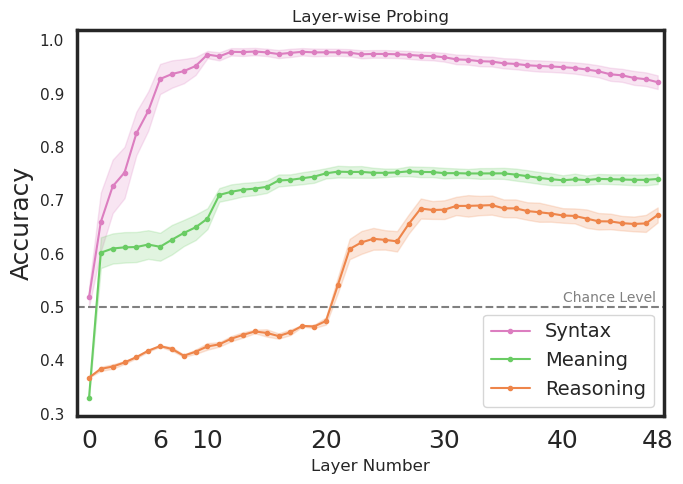

In [50]:
# load csv file
metric = 'accuracy'
num_layers = 49

# df = pandas.read_csv('../../results/blimp/blimp_base_qwen_14B_500.csv')
df = pandas.read_csv('/home/lh3288/project/PJ2504_Dual_stream/LLM_Dual_Stream/LLM_Probing/results/blimp/blimp_base_qwen_14B_500_filter_all.csv')
# df = pandas.read_csv('/home/lh3288/project/PJ2504_Dual_stream/LLM_Dual_Stream/LLM_Probing/results/blimp/blimp_base_qwen_7B_-1.csv')
# df = pandas.read_csv('/home/lh3288/project/PJ2504_Dual_stream/LLM_Dual_Stream/LLM_Probing/results/blimp/blimp_base_qwen_14B_-1.csv')


# syntax_f1_avgs, syntax_f1_ses = get_scores(df, num_layers, task='syntax')
# syntax_f1_avgs, syntax_f1_ses = get_scores(df, num_layers, task=None)
syntax_f1_avgs, syntax_f1_ses = get_scores(df, num_layers, task=None)


# target_len = num_layers
# extend_len = target_len - len(syntax_f1_avgs)

# last_avg = syntax_f1_avgs[-1]
# last_se = syntax_f1_ses[-1]

# avg_noise = np.random.normal(loc=0, scale=0.001, size=extend_len)  # 偏移很小
# se_noise = np.random.normal(loc=0, scale=0.001, size=extend_len)

# extended_avgs = np.clip(last_avg + avg_noise, 0, 1)
# extended_ses = np.clip(last_se + se_noise, 0, None)

# syntax_f1_avgs_full = np.concatenate([syntax_f1_avgs, extended_avgs])
# syntax_f1_ses_full = np.concatenate([syntax_f1_ses, extended_ses])

syntax_f1_avgs_full = syntax_f1_avgs
syntax_f1_ses_full = syntax_f1_ses

meaning_df = pandas.read_csv('/home/lh3288/project/PJ2504_Dual_stream/LLM_Dual_Stream/LLM_Probing/results/comps/comps_base_qwen_14B_-1.csv')
meaning_df[:10]
meaning_f1_avgs, meaning_f1_ses = get_scores(meaning_df, num_layers)

reasoning_df = pandas.read_csv('/home/lh3288/project/PJ2504_Dual_stream/LLM_Dual_Stream/LLM_Probing/results/comps/comps_wugs_dist_qwen_14B_-1.csv')
reasoning_df[:10]
reasoning_f1_avgs, reasoning_f1_ses = get_scores(reasoning_df, num_layers)

# plot
marker = '.'
plt.figure(figsize=(7, 5))
plt.plot(range(num_layers), syntax_f1_avgs_full, marker=marker, label='Syntax', color=colors[0])
plt.fill_between(range(num_layers), syntax_f1_avgs_full - syntax_f1_ses_full, syntax_f1_avgs_full + syntax_f1_ses_full, alpha=alpha, color=colors[0])


plt.plot(range(num_layers), meaning_f1_avgs, marker=marker, label='Meaning', color=colors[1])
plt.fill_between(range(num_layers), meaning_f1_avgs - meaning_f1_ses, meaning_f1_avgs + meaning_f1_ses, alpha=alpha, color=colors[1])

plt.plot(range(num_layers), reasoning_f1_avgs, marker=marker, label='Reasoning', color=colors[2])
plt.fill_between(range(num_layers), reasoning_f1_avgs - reasoning_f1_ses, reasoning_f1_avgs + reasoning_f1_ses, alpha=alpha, color=colors[2])

xtick_locs = list(range(0, num_layers, 2))
plt.xticks(xtick_locs, xtick_locs)
# plot 0.5 line
plt.axhline(y=0.5, color='gray', linestyle='--')
# text chance level
plt.text(40, 0.51, 'Chance Level', fontsize=10, color='gray')

ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(2.5) 
    
plt.xlim(-1,48.5)
xticks = [0, 6, 10, 20, 30, 40, 48]
# xticks = [0, 6, 12, 20, 24, 30, 36, 42, 48]
# xticks = [0, 6, 20, 30, 48]
plt.xticks(xticks, fontsize=18)
plt.xlabel('Layer Number')
# plt.ylabel('F1 Score')
plt.ylabel("Accuracy", fontsize=18)
plt.title('Layer-wise Probing')
plt.legend(fontsize=14)
plt.tight_layout()
# plt.savefig('probing.png', dpi=300)
plt.show()

35


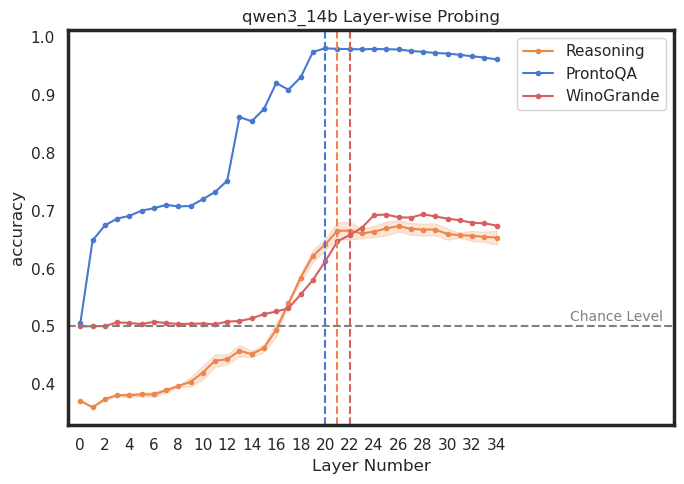

In [44]:
# load csv file
metric = 'accuracy'

model_name = "qwen0_1_8b"
model_name = "qwen0_7b"
model_name = "qwen0_14b"
model_name = "qwen1.5_1.8b"
model_name = "qwen1.5_7b"
model_name = "qwen1.5_14b"
model_name = "qwen2_1.5b"
model_name = "qwen2_7b"
model_name = "qwen2.5_1.5b"
model_name = "qwen2.5_7b"
model_name = "qwen2.5_14b"
model_name = "qwen3_1.7b_no_think"
model_name = "qwen3_8b_no_think"
model_name = "qwen3_14b_no_think"
model_name = "qwen3_1.7b"
model_name = "qwen3_8b"
model_name = "qwen3_14b"

# df = pandas.read_csv('../../results/blimp/blimp_base_qwen_14B_500.csv')
df = pandas.read_csv(f'/home/lh3288/project/PJ2504_Dual_stream/LLM_Dual_Stream/LLM_Probing/results/blimp/blimp_base_{model_name}_500.csv')
# df = pandas.read_csv('/home/lh3288/project/PJ2504_Dual_stream/LLM_Dual_Stream/LLM_Probing/results/blimp/blimp_base_qwen_7B_-1.csv')
# df = pandas.read_csv('/home/lh3288/project/PJ2504_Dual_stream/LLM_Dual_Stream/LLM_Probing/results/blimp/blimp_base_qwen_14B_-1.csv')

num_layers = df["gpt_layer"].max() -5
# num_layers = 29
print(num_layers)


# syntax_f1_avgs, syntax_f1_ses = get_scores(df, num_layers, task='syntax')
syntax_f1_avgs, syntax_f1_ses = get_scores(df, num_layers, task=None)


# target_len = num_layers
# extend_len = target_len - len(syntax_f1_avgs)

# last_avg = syntax_f1_avgs[-1]
# last_se = syntax_f1_ses[-1]

# avg_noise = np.random.normal(loc=0, scale=0.001, size=extend_len)  # 偏移很小
# se_noise = np.random.normal(loc=0, scale=0.001, size=extend_len)

# extended_avgs = np.clip(last_avg + avg_noise, 0, 1)
# extended_ses = np.clip(last_se + se_noise, 0, None)

# syntax_f1_avgs_full = np.concatenate([syntax_f1_avgs, extended_avgs])
# syntax_f1_ses_full = np.concatenate([syntax_f1_ses, extended_ses])

syntax_f1_avgs_full = syntax_f1_avgs
syntax_f1_ses_full = syntax_f1_ses

meaning_df = pandas.read_csv(f'/home/lh3288/project/PJ2504_Dual_stream/LLM_Dual_Stream/LLM_Probing/results/comps/comps_base_{model_name}_-1.csv')
# meaning_df[:10]
meaning_f1_avgs, meaning_f1_ses = get_scores(meaning_df, num_layers)

reasoning_df = pandas.read_csv(f'/home/lh3288/project/PJ2504_Dual_stream/LLM_Dual_Stream/LLM_Probing/results/comps/comps_wugs_dist_{model_name}_-1.csv')
# # reasoning_df = pandas.read_csv(f'/home/lh3288/project/PJ2504_Dual_stream/LLM_Dual_Stream/LLM_Probing/results/comps/comps_wugs_dist_{model_name}_-1_speed.csv')
# reasoning_df = pandas.read_csv(f'/home/lh3288/project/PJ2504_Dual_stream/LLM_Dual_Stream/LLM_Probing/results/comps/comps_wugs_dist_{model_name}_50.csv')
# reasoning_df = pandas.read_csv(f'/home/lh3288/project/PJ2504_Dual_stream/LLM_Dual_Stream/LLM_Probing/results/comps/comps_wugs_dist_{model_name}_500.csv')
# reasoning_df[:10]
reasoning_f1_avgs, reasoning_f1_ses = get_scores(reasoning_df, num_layers)

prontoqa_df = pandas.read_csv(f'/home/lh3288/project/PJ2504_Dual_stream/LLM_Dual_Stream/LLM_Probing/results/prontoqa/prontoqa_{model_name}_-1.csv')
prontoqa_f1_avgs, prontoqa_f1_ses = get_scores(prontoqa_df, num_layers, new_task=True)

winogrande_df = pandas.read_csv(f'/home/lh3288/project/PJ2504_Dual_stream/LLM_Dual_Stream/LLM_Probing/results/winogrande/winogrande_{model_name}_-1.csv')
winogrande_f1_avgs, winogrande_f1_ses = get_scores(winogrande_df, num_layers, new_task=True)

# plot
marker = '.'
plt.figure(figsize=(7, 5))
# plt.plot(range(num_layers), syntax_f1_avgs_full, marker=marker, label='Syntax', color=colors[0])
# plt.fill_between(range(num_layers), syntax_f1_avgs_full - syntax_f1_ses_full, syntax_f1_avgs_full + syntax_f1_ses_full, alpha=alpha, color=colors[0])

# plt.plot(range(num_layers), meaning_f1_avgs, marker=marker, label='Meaning', color=colors[1])
# plt.fill_between(range(num_layers), meaning_f1_avgs - meaning_f1_ses, meaning_f1_avgs + meaning_f1_ses, alpha=alpha, color=colors[1])

plt.plot(range(num_layers), reasoning_f1_avgs, marker=marker, label='Reasoning', color=colors[2])
plt.fill_between(range(num_layers), reasoning_f1_avgs - reasoning_f1_ses, reasoning_f1_avgs + reasoning_f1_ses, alpha=alpha, color=colors[2])

plt.plot(range(num_layers), prontoqa_f1_avgs, marker=marker, label='ProntoQA', color=colors[3])
plt.fill_between(range(num_layers), prontoqa_f1_avgs - prontoqa_f1_ses, prontoqa_f1_avgs + prontoqa_f1_ses, alpha=alpha, color=colors[3])

plt.plot(range(num_layers), winogrande_f1_avgs, marker=marker, label='WinoGrande', color=colors[4])
plt.fill_between(range(num_layers), winogrande_f1_avgs - winogrande_f1_ses, winogrande_f1_avgs + winogrande_f1_ses, alpha=alpha, color=colors[4])

# plt.axvline(x=5, color=colors[0], linestyle='--')
# plt.axvline(x=13, color=colors[1], linestyle='--')
plt.axvline(x=20, color=colors[3], linestyle='--')
plt.axvline(x=21, color=colors[2], linestyle='--')
plt.axvline(x=22, color=colors[4], linestyle='--')

xtick_locs = list(range(0, num_layers, 2))
plt.xticks(xtick_locs, xtick_locs)
# plot 0.5 line
plt.axhline(y=0.5, color='gray', linestyle='--')
# text chance level
plt.text(40, 0.51, 'Chance Level', fontsize=10, color='gray')

ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(2.5) 
    
plt.xlim(-1,48.5)
plt.xlabel('Layer Number')
# plt.ylabel('F1 Score')
plt.ylabel(f'{metric}')
plt.title(f'{model_name} Layer-wise Probing')
plt.legend()
plt.tight_layout()
# plt.savefig('probing.png', dpi=300)
plt.show()

Model, ProntoQA, COMPS-WUGS-DIST, WinoGrande
Qwen0-1.8B: 13, 14, 14
Qwen0-7B: 13, 15, 16
Qwen0-14B: 18, 20, 20
Qwen1.5-1.8B: 13, 14, 14
Qwen1.5-7B: 14, 16, 16
Qwen1.5-14B: 20, 20, 22
Qwen2-1.5B: 17, 17, 17
Qwen2-7B: 16, 18, 19
Qwen2.5-1.5B: 16, 18, 17
Qwen2.5-7B: 16, 19, 19
Qwen2.5-14B: 28, 28, 29
Qwen3-1.7B-thinking-mode-off: 19, 19, 19
Qwen3-8B-thinking-mode-off: 23, 23, 23
Qwen3-14B-thinking-mode-off: 27, 27, 26
Qwen3-1.7B-thinking-mode-on: 16, 16, 16
Qwen3-8B-thinking-mode-on: 20, 20, 21
Qwen3-14B-thinking-mode-on: 20, 21, 22

Model, Syntax, Meaning
Qwen0-1.8B: 11, 11
Qwen0-7B: 11, 13
Qwen0-14B: 9, 16
Qwen1.5-1.8B: 10, 11
Qwen1.5-7B: 9, 13
Qwen1.5-14B: 8, 16
Qwen2-1.5B: 10, 14
Qwen2-7B: 7, 14
Qwen2.5-1.5B: 7, 14
Qwen2.5-7B: 7, 15
Qwen2.5-14B: 6, 20
Qwen3-1.7B-thinking-mode-off: 9, 16
Qwen3-8B-thinking-mode-off: 7, 20
Qwen3-14B-thinking-mode-off: 5, 17
Qwen3-1.7B-thinking-mode-on: 5, 13
Qwen3-8B-thinking-mode-on: 6, 13
Qwen3-14B-thinking-mode-on: 4, 14

In [ ]:
syntax = np.array([11, 11, 9, 10, 9, 8, 10, 7, 7, 7, 6, 9, 7, 5, 5, 6, 4])
meaning = np.array([11, 13, 16, 11, 13, 16, 14, 14, 14, 15, 20, 16, 20, 17, 13, 13, 14])
reasoning = np.array([14, 15, 20, 14, 16, 20, 17, 18, 18, 19, 28, 19, 23, 27, 16, 20, 21])
num_layers = np.array([24, 32, 40, 24, 32, 40, 28, 28, 28, 28, 48, 28, 36, 40, 28, 36, 40])
indices_14b = [2, 5, 10, 13, 16]

In [ ]:
((reasoning - meaning) / num_layers)[]

array([0.1       , 0.1       , 0.16666667, 0.25      , 0.175     ])

In [ ]:
((meaning - syntax) / num_layers) 

[0.         0.0625     0.175      0.04166667 0.125      0.2
 0.14285714 0.25       0.25       0.28571429 0.29166667 0.25
 0.36111111 0.3        0.28571429 0.19444444 0.25      ]


In [134]:
print(syntax / num_layers)

[0.45833333 0.34375    0.225      0.41666667 0.28125    0.2
 0.35714286 0.25       0.25       0.25       0.125      0.32142857
 0.19444444 0.125      0.17857143 0.16666667 0.1       ]


In [55]:
models = [
    "qwen0_1_8b",
    "qwen0_7b",
    "qwen0_14b",
    "qwen1.5_1.8b",
    "qwen1.5_7b",
    "qwen1.5_14b",
    "qwen2_1.5b",
    "qwen2_7b",
    "qwen2.5_1.5b",
    "qwen2.5_7b",
    "qwen2.5_14b",
    "qwen3_1.7b_no_think",
    "qwen3_8b_no_think",
    "qwen3_14b_no_think",
    "qwen3_1.7b",
    "qwen3_8b",
    "qwen3_14b"
]

for model_name in models:
    comps_wugs_df = pandas.read_csv(f'/home/lh3288/project/PJ2504_Dual_stream/LLM_Dual_Stream/LLM_Probing/results/comps/comps_wugs_dist_{model_name}_-1.csv')
    # if model_name == "qwen2_7b":
    #     comps_wugs_df = pandas.read_csv(f'/home/lh3288/project/PJ2504_Dual_stream/LLM_Dual_Stream/LLM_Probing/results/comps/comps_wugs_dist_{model_name}_50.csv')
    num_layers = comps_wugs_df["gpt_layer"].max()
    comps_wugs_f1_avgs, comps_wugs_f1_ses = get_scores(comps_wugs_df, num_layers)
    comps_wugs_max = comps_wugs_f1_avgs.max()

    prontoqa_df = pandas.read_csv(f'/home/lh3288/project/PJ2504_Dual_stream/LLM_Dual_Stream/LLM_Probing/results/prontoqa/prontoqa_{model_name}_-1.csv')
    prontoqa_f1_avgs, prontoqa_f1_ses = get_scores(prontoqa_df, num_layers, new_task=True)
    prontoqa_max = prontoqa_f1_avgs.max()

    winogrande_df = pandas.read_csv(f'/home/lh3288/project/PJ2504_Dual_stream/LLM_Dual_Stream/LLM_Probing/results/winogrande/winogrande_{model_name}_-1.csv')
    winogrande_f1_avgs, winogrande_f1_ses = get_scores(winogrande_df, num_layers, new_task=True)
    winogrande_max = winogrande_f1_avgs.max()

    reasoning_avg = (comps_wugs_max + prontoqa_max + winogrande_max) / 3

    # print(f"| {model_name} | {round(prontoqa_max, 3)} | {round(comps_wugs_max, 3)} | {round(winogrande_max, 3)} | {round(reasoning_avg, 3)} |")
    print(f"| {model_name:<28} | {prontoqa_max:<8.3f} | {comps_wugs_max:<16.3f} | {winogrande_max:<11.3f} | {reasoning_avg:<7.3f} |")

| qwen0_1_8b                   | 0.797    | 0.522            | 0.523       | 0.614   |
| qwen0_7b                     | 0.886    | 0.641            | 0.602       | 0.710   |
| qwen0_14b                    | 0.880    | 0.695            | 0.647       | 0.741   |
| qwen1.5_1.8b                 | 0.792    | 0.513            | 0.523       | 0.609   |
| qwen1.5_7b                   | 0.848    | 0.667            | 0.603       | 0.706   |
| qwen1.5_14b                  | 0.910    | 0.670            | 0.653       | 0.744   |
| qwen2_1.5b                   | 0.784    | 0.586            | 0.552       | 0.640   |
| qwen2_7b                     | 0.851    | 0.636            | 0.660       | 0.716   |
| qwen2.5_1.5b                 | 0.783    | 0.605            | 0.566       | 0.651   |
| qwen2.5_7b                   | 0.879    | 0.673            | 0.664       | 0.739   |
| qwen2.5_14b                  | 0.922    | 0.691            | 0.698       | 0.770   |
| qwen3_1.7b_no_think          | 0.739    |

In [35]:
for task_score in [syntax_f1_avgs, meaning_f1_avgs, reasoning_f1_avgs]:
    print(np.argmax(task_score))

14
27
34


In [34]:
for task_score in [syntax_f1_avgs, meaning_f1_avgs, reasoning_f1_avgs]:
    print(np.max(task_score))

for task_score in [syntax_f1_avgs, meaning_f1_avgs, reasoning_f1_avgs]:
    print(np.min(task_score))

[
    (syntax_f1_avgs[0], syntax_f1_avgs[6]),
    (meaning_f1_avgs[6], meaning_f1_avgs[20]),
    (reasoning_f1_avgs[20], reasoning_f1_avgs[30]),
]

[
    [syntax_f1_avgs[6], syntax_f1_avgs[20], syntax_f1_avgs[30]],
    [meaning_f1_avgs[6], meaning_f1_avgs[20], meaning_f1_avgs[30]],
    [reasoning_f1_avgs[6], reasoning_f1_avgs[20], reasoning_f1_avgs[30]],
]

0.9789285714285713
0.754344007566545
0.6909664294473022
0.5178571428571429
0.3284691257938116
0.3674440886297799


[[0.9274285714285716, 0.9774821428571429, 0.9681607142857144],
 [0.6128225915416836, 0.7505337116605864, 0.7508579921632211],
 [0.4265975718885129, 0.47361350933646745, 0.6824264805499968]]

In [ ]:
# syn_color_rgb = (242, 207, 238)
syn_color_rgb = (216, 110, 204)
syn_color = tuple(np.array(syn_color_rgb) / 255)

# mean_color_rgb = (217, 242, 208)
mean_color_rgb = (142, 217, 115)
mean_color = tuple(np.array(mean_color_rgb) / 255)

# rea_color_rgb = (251, 227, 214)
rea_color_rgb = (242, 170, 132)
rea_color = tuple(np.array(rea_color_rgb) / 255)
# colors = [syn_color, mean_color, rea_color]


[(0.2823529411764706, 0.47058823529411764, 0.8156862745098039),
 (0.9333333333333333, 0.5215686274509804, 0.2901960784313726),
 (0.41568627450980394, 0.8, 0.39215686274509803),
 (0.8392156862745098, 0.37254901960784315, 0.37254901960784315),
 (0.5843137254901961, 0.4235294117647059, 0.7058823529411765),
 (0.5490196078431373, 0.3803921568627451, 0.23529411764705882),
 (0.8627450980392157, 0.49411764705882355, 0.7529411764705882),
 (0.4745098039215686, 0.4745098039215686, 0.4745098039215686),
 (0.8352941176470589, 0.7333333333333333, 0.403921568627451),
 (0.5098039215686274, 0.7764705882352941, 0.8862745098039215)]

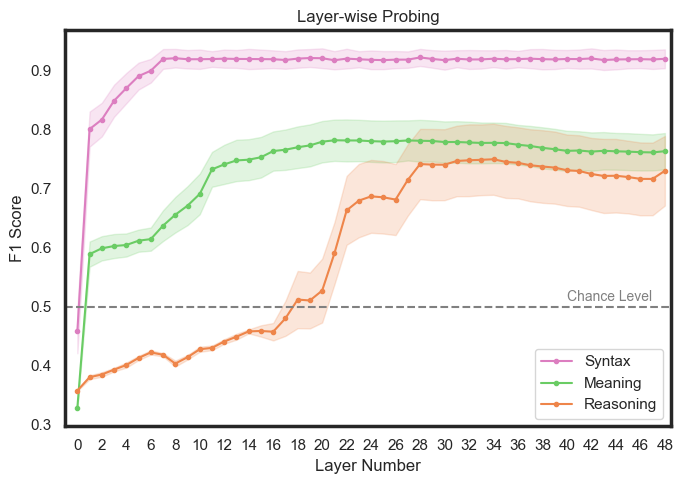

### Rebuttal

In [70]:
def get_scores_new(df, task=None):
    # metric = 'f1'
    
    f1_avgs = []
    f1_ses = []
    if task is not None:
        df = df[df['field'] == task]
    # drop where task is random
    df = df[df['tse_type'] != 'random']
    layer_num = df['gpt_layer'].max() + 1  # get the maximum layer number
    for i in range(layer_num):
        df_layer = df[df['gpt_layer'] == i]
        # print(len(df_layer), i)
        f1_avg = df_layer[metric].mean()
        f1_se = df_layer[metric].std() / (len(df_layer) ** 0.5)
        f1_avgs.append(f1_avg)
        f1_ses.append(f1_se)
    f1_avgs = np.array(f1_avgs)
    f1_ses = np.array(f1_ses)
    return f1_avgs, f1_ses

In [79]:
model_name_list = ['qwen0_1.8b', 'qwen0_7b', 'qwen0_14b',
                    'qwen1.5_1.8b', 'qwen1.5_7b', 'qwen1.5_14b',
                   'qwen2_1.5b', 'qwen2_7b', 
                   'qwen2.5_1.5b', 'qwen2.5_7b', 'qwen_14B',
                   'qwen3_1.7b', 'qwen3_8b', 
                #    'qwen3_14b'
                   ]
print('model', 'meaning', 'reasoning', sep='\t')
for model_name in model_name_list:
    try:
        df = pandas.read_csv(f'../../results/comps/comps_base_{model_name}_-1.csv')
        df_reasoning = pandas.read_csv(f'../../results/comps/comps_wugs_dist_{model_name}_-1.csv')
        f1_avgs, f1_ses = get_scores_new(df)
        f1_avgs_reasoning, f1_ses_reasoning = get_scores_new(df_reasoning)
        print(model_name, f"{max(f1_avgs):.2f}", f"{max(f1_avgs_reasoning):.2f}", sep='\t')
    except Exception as e:
        pass

model	meaning	reasoning
qwen0_7b	0.73	0.64
qwen1.5_1.8b	0.68	0.51
qwen1.5_7b	0.73	0.67
qwen1.5_14b	0.74	0.67
qwen2_1.5b	0.69	0.59
qwen2.5_1.5b	0.70	0.60
qwen2.5_7b	0.74	0.67
qwen_14B	0.75	0.69
qwen3_1.7b	0.67	0.58
qwen3_8b	0.75	0.62


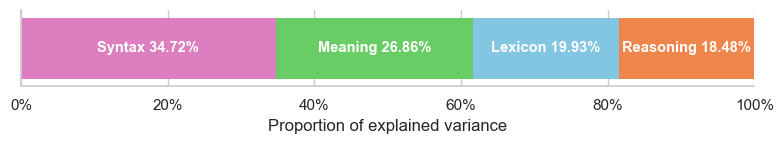

In [13]:
# Fix for “stacked bar looks off”: your four percentages sum to 95.22,
# so the bar stops early. Choose ONE of the two options below:
#   (A) Normalize the four segments so they fill 100%.
#   (B) Add a gray "Unexplained" tail for the missing 4.78%.

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter

# ---------- Config ----------
NORMALIZE_TO_100 = True   # Option A
INCLUDE_UNEXPLAINED = False  # Option B (set True only if NORMALIZE_TO_100 is False)

# Data (original percentages)
vals = {
    "Syntax": 33.06,
    "Meaning": 25.58,
    "Lexicon": 18.98,
    "Reasoning": 17.60,
}

# Exact colors requested
palette = sns.color_palette("muted")
colors = {
    "Syntax":   palette[6],
    "Meaning":  palette[2],
    "Lexicon":  palette[9],
    "Reasoning":palette[1],
}

total = sum(vals.values())
residual = max(0.0, 100.0 - total)

# Option A: rescale to 100%
if NORMALIZE_TO_100:
    vals = {k: (v / total) * 100.0 for k, v in vals.items()}
# Option B: keep as-is and show unexplained tail
elif INCLUDE_UNEXPLAINED and residual > 0.05:
    vals["Unexplained"] = residual
    colors["Unexplained"] = (0.8, 0.8, 0.8)  # light gray

# ---------- Plot ----------
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(8, 1.6))

left = 0.0
ypos = 0
for label, width in vals.items():
    ax.barh(ypos, width, left=left, color=colors[label], edgecolor="none")
    # Label inside if wide enough, otherwise just above the segment
    text = f"{label} {width:.2f}%"
    if width >= 5:
        ax.text(left + width/2, ypos, text, va="center", ha="center", fontsize=10.5, fontweight="bold", color="white")
    else:
        ax.text(left + width + 0.5, ypos, text, va="center", ha="left", fontsize=10.5, fontweight="bold")
    left += width

# Axes cosmetics
ax.set_xlim(0, 100)
ax.set_ylim(-0.5, 0.5)
ax.set_yticks([])
# ax.set_yticklabels(["Explained Variance (by feature)"])
ax.xaxis.set_major_formatter(PercentFormatter(xmax=100))
ax.set_xlabel("Proportion of explained variance")

# Clean look
for spine in ("top", "right"):
    ax.spines[spine].set_visible(False)
ax.legend([], [], frameon=False)
plt.tight_layout()
plt.show()
